In [5]:
import warnings

import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
warnings.simplefilter(action='ignore', category=FutureWarning)
    # R과 비슷한 코드 작성을 위해 FutureWarning 무시
plt.style.use('seaborn')

# 단순 성형회귀분석

In [21]:
brain_data = pd.read_excel('brains.xls', index_col='Label') 
brain_data

,BodyWt,BrainWt
Label,,
Arctic fox,3.385,44.500
Owl monkey,0.480,15.499
Beaver,1.350,8.100
Cow,464.983,423.012
Gray wolf,36.328,119.498
...,...,...
Brazilian tapir,160.004,169.000
Tenrec,0.900,2.600
Phalanger,1.620,11.400


In [23]:
brain_model = ols('BrainWt ~ BodyWt', data=brain_data).fit()
print(brain_model.summary())

                            OLS Regression Results                            
Dep. Variable:                BrainWt   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.1
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           1.55e-28
Time:                        18:31:31   Log-Likelihood:                -447.39
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.0086     43.556      2.089      0.0

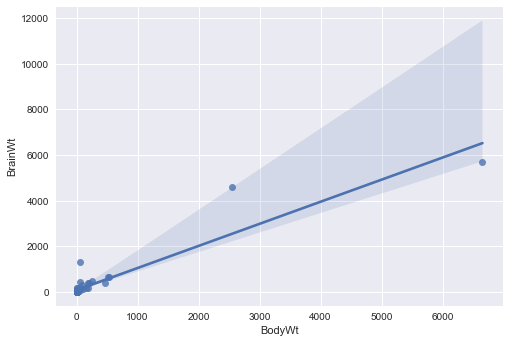

In [25]:
sns.regplot('BodyWt', 'BrainWt', data=brain_data, ci=95)
plt.show()

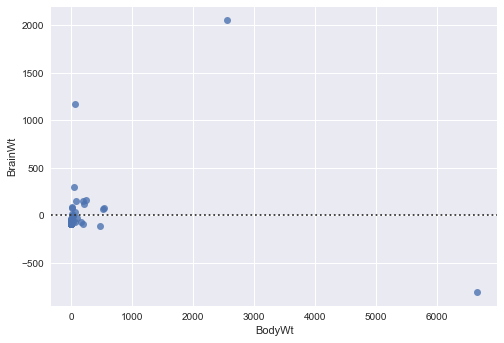

In [26]:
sns.residplot('BodyWt', 'BrainWt', data=brain_data)
plt.show()

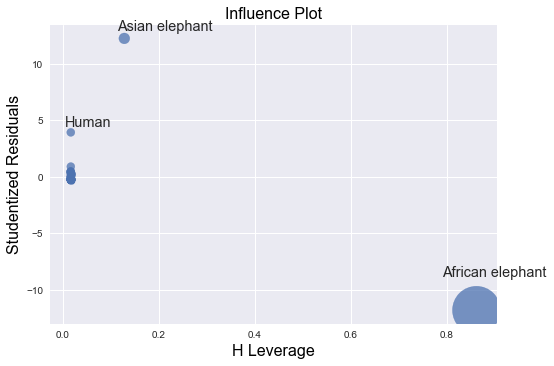

In [27]:
#영향도 그림
sm.graphics.influence_plot(brain_model)
plt.show()

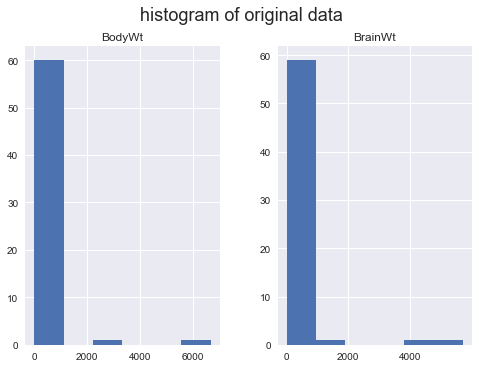

In [29]:
#원 변수의 히스토그램
brain_data.hist(bins=6) #bin: 변수값들을 몇 개의 구간으로 나눌지 결정
plt.suptitle('histogram of original data',fontsize=18)
plt.show()

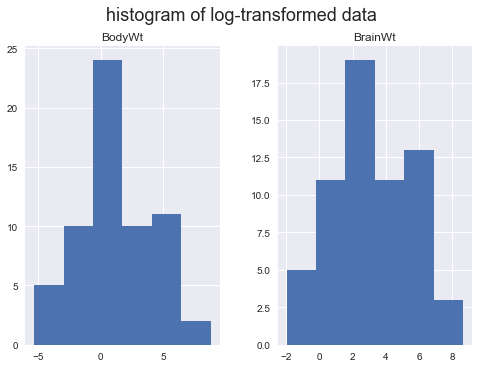

In [30]:
log_brain_data = np.log(brain_data)
#로그변환 후 변수의 히스토그램
log_brain_data.hist(bins=6)
plt.suptitle('histogram of log-transformed data',fontsize=18)
plt.show()

In [32]:
log_brain_model = ols('BrainWt ~ BodyWt', data=log_brain_data).fit()
print(log_brain_model.summary())

                            OLS Regression Results                            
Dep. Variable:                BrainWt   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Fri, 03 Sep 2021   Prob (F-statistic):           9.83e-35
Time:                        18:37:29   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1348      0.096     22.227      0.0

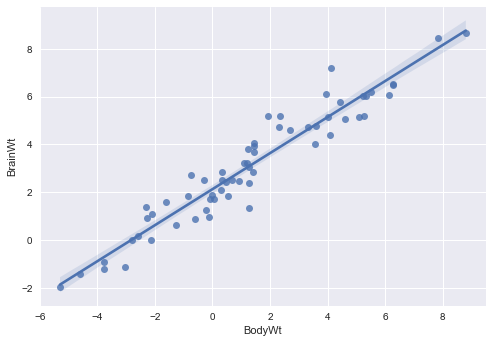

In [34]:
sns.regplot('BodyWt', 'BrainWt', data=log_brain_data, ci=95)
plt.show()

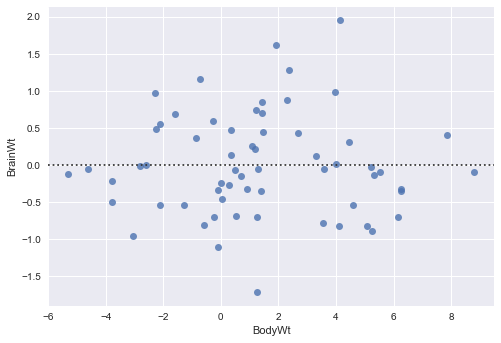

In [35]:
sns.residplot('BodyWt', 'BrainWt', data=log_brain_data)
plt.show()

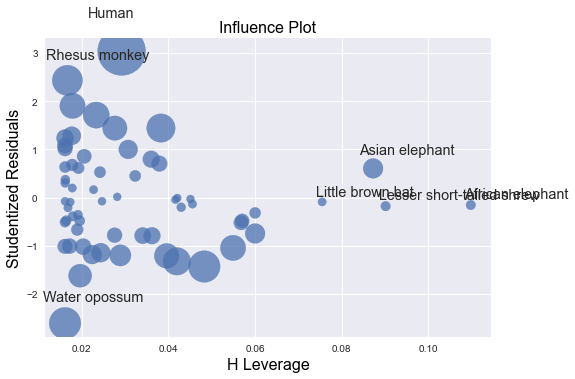

In [36]:
sm.graphics.influence_plot(log_brain_model)
plt.show()

# 다항

In [42]:
data = pd.read_csv('credit.csv', index_col='ID').drop('Unnamed: 0', axis=1)
data

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
ID,,,,,,,,,,,
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13.364,3838,296,5,65,17,Male,No,No,African American,480
398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138


In [43]:
data = data.drop(['Gender', 'Student', 'Married', 'Ethnicity'], axis=1) 

<Figure size 1440x1440 with 0 Axes>

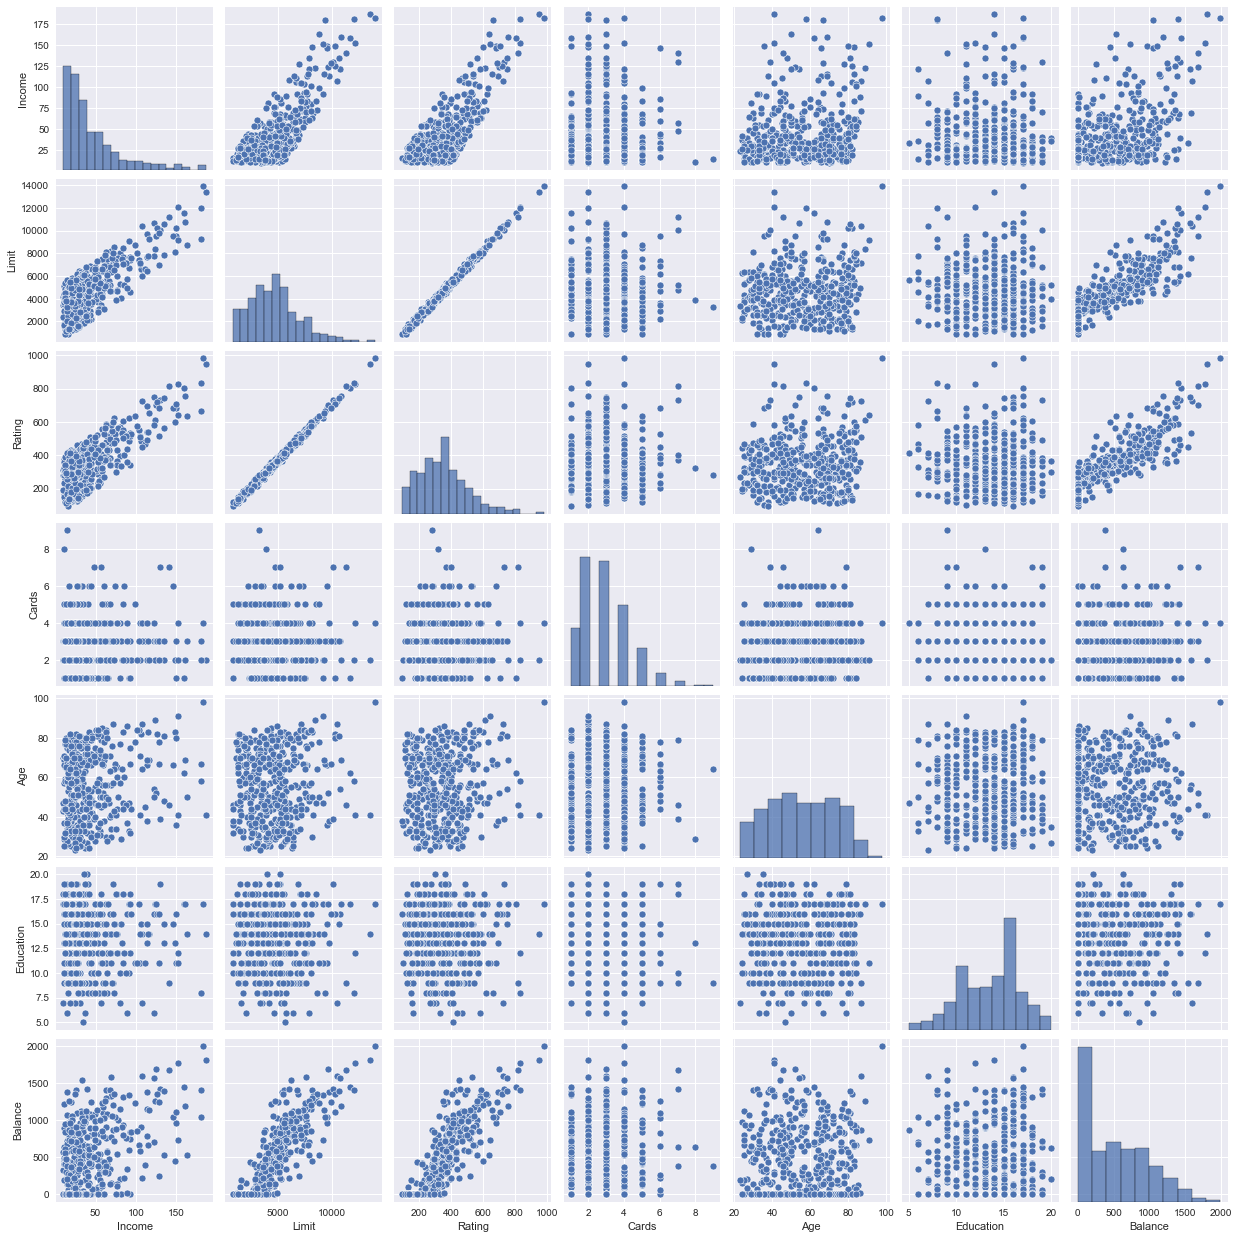

In [44]:
plt.figure(figsize=(20,20))
sns.pairplot(data) #행렬산점도 그림
plt.show()

In [45]:
X = data.drop(['Balance'], axis=1)
y = data.Balance

In [46]:
formula = 'Balance ~ Income + Limit + Rating + Cards + Age + Education'
results = ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     472.5
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          3.01e-176
Time:                        20:35:09   Log-Likelihood:                -2598.2
No. Observations:                 400   AIC:                             5210.
Df Residuals:                     393   BIC:                             5238.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -477.9581     55.065     -8.680      0.0

In [47]:
#전진선택법
def forward_selected_aic(data, response):
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = np.inf, np.inf
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().aic # (also can change bic)
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        print(pd.DataFrame(scores_with_candidates).T)
        best_new_score, best_candidate = scores_with_candidates.pop()
        print('---->',best_new_score, best_candidate, '\n')
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [48]:
#후진제거법
def backward_selected_aic(data, response):
    selected = set(data.columns)
    selected.remove(response)
    current_score, best_new_score = np.inf, np.inf
    while selected and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in selected:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected - set([candidate])))
            score = ols(formula, data).fit().aic # (also can change bic)
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort(reverse=True)
        print(pd.DataFrame(scores_with_candidates).T)
        best_new_score, best_candidate = scores_with_candidates.pop()
        print('---->',best_new_score, best_candidate, '\n')
        if current_score > best_new_score:
            selected.remove(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [49]:
model = forward_selected_aic(data, 'Balance')

print(model.model.formula)
print(model.summary())

             0            1            2           3            4            5
0  6042.709965  6042.685316  6039.710202  5945.89425  5499.982633  5494.781548
1          Age    Education        Cards      Income        Limit       Rating
----> 5494.781548180919 Rating 

             0            1            2            3            4
0  5496.632982  5496.272851  5494.187124  5484.481339  5212.557085
1        Limit    Education        Cards          Age       Income
----> 5212.557084956779 Income 

             0            1            2            3
0  5214.477534  5213.765645  5211.113461  5210.950291
1        Cards    Education          Age        Limit
----> 5210.950291148072 Limit 

             0           1            2
0  5212.405324  5210.50723  5209.720526
1    Education       Cards          Age
----> 5209.7205261188565 Age 

            0            1
0  5211.14177  5209.013438
1   Education        Cards
----> 5209.013438304616 Cards 

             0
0  5210.412569
1    Edu

In [50]:
model = backward_selected_aic(data, 'Balance')

print(model.model.formula)
print(model.summary())

             0            1           2            3           4            5
0  5484.501599  5215.221616  5214.10286  5211.943243  5211.14177  5209.013438
1       Income       Rating       Limit          Age       Cards    Education
----> 5209.013438304617 Education 

             0            1            2           3            4
0  5483.056098  5213.577861  5212.965998  5210.50723  5209.720526
1       Income       Rating        Limit         Age        Cards
----> 5209.7205261188565 Cards 

Balance ~ Rating + Cards + Age + Income + Limit + 1
                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     567.4
Date:                Fri, 03 Sep 2021   Prob (F-statistic):          1.61e-177
Time:                        20:37:38   Log-Likeliho

# Lasso

In [53]:
X

,Income,Limit,Rating,Cards,Age,Education
ID,,,,,,
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15
3,104.593,7075,514,4,71,11
4,148.924,9504,681,3,36,11
5,55.882,4897,357,2,68,16
...,...,...,...,...,...,...
396,12.096,4100,307,3,32,13
397,13.364,3838,296,5,65,17
398,57.872,4171,321,5,67,12


/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  del sys.path[0]
/Users/goyunjae/opt/miniconda3/envs/ML2020/lib/python3.7/site-packages/ipykernel_launcher.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

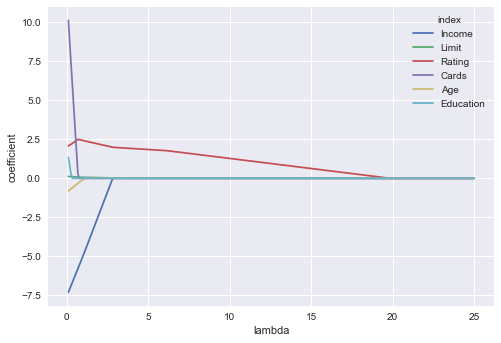

In [57]:
alphas = np.linspace(0.1, 25, 300)
df = pd.DataFrame()
 
column =  X.columns

scaler = StandardScaler()


for cnt in alphas:
    temp_model = LassoCV(cv=5, random_state=0, alphas=[cnt], max_iter=1e5, normalize=True).fit(X,y)
                     
    temp_coef = pd.Series(temp_model.coef_,index=column)
    df[temp_model.alpha_] = temp_coef
 
df = df.reset_index().melt(id_vars='index')
 
        
# 그래프
sns.lineplot(x="variable", y="value", hue="index",
             data=df)
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.show()

In [55]:
model = LassoCV(cv=5, alphas=None, random_state=0, 
                max_iter=1e5, normalize=True).fit(X,y)

In [56]:
column =  X.columns
print('best lambda: %.2f\n' % model.alpha_)
print('회귀계수:\n',
      [name + ' : %.2f' % coef for name, coef in zip(column, model.coef_)])
print('\n회귀절편: %.2f\n' % model.intercept_)

best lambda: 0.02

회귀계수:
 ['Income : -7.50', 'Limit : 0.13', 'Rating : 2.03', 'Cards : 11.45', 'Age : -0.87', 'Education : 1.85']

회귀절편: -473.76

